In [1]:
#importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cols=['SHDR_IDL','PROD_IDL','PRTYPE_IDL','RPRICE','QUANTITY','DATEORDER']
dtl=pd.read_csv("data/SalesDTL.csv",usecols=cols,parse_dates=['DATEORDER'],
                dtype={'SHDR_IDL':int,'PROD_IDL':int,'PRTYPE_IDL':int,'QUANTITY':int})

#converting column names to lower case
dtl.columns=dtl.columns.str.lower()

dtl=dtl.set_index("dateorder")
dtl['rprice']=dtl['rprice'].abs()
dtl['total_price']=dtl['rprice']*dtl['quantity']
dtl=dtl.loc['2016-03-06':,]
dtl['prod_idl']=dtl['prod_idl'].astype('category')
dtl.head()

,shdr_idl,prod_idl,prtype_idl,rprice,quantity,total_price
dateorder,,,,,,
2016-03-06 14:33:35,31424,51,13,3.5,1,3.5
2016-03-06 14:35:41,31425,163,26,39.8,4,159.2
2016-03-06 14:35:41,31425,81,26,8.5,1,8.5
2016-03-06 14:36:35,31426,163,26,19.9,2,39.8
2016-03-06 14:37:43,31427,428,26,19.9,2,39.8


In [3]:
dtl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 457466 entries, 2016-03-06 14:33:35 to 2017-11-05 22:46:15
Data columns (total 6 columns):
shdr_idl       457466 non-null int32
prod_idl       457466 non-null category
prtype_idl     457466 non-null int32
rprice         457466 non-null float64
quantity       457466 non-null int32
total_price    457466 non-null float64
dtypes: category(1), float64(2), int32(3)
memory usage: 16.6 MB


In [4]:
dtl['shdr_idl']=dtl['shdr_idl'].astype('category')
dtl['prtype_idl']=dtl['prtype_idl'].astype('category')
dtl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 457466 entries, 2016-03-06 14:33:35 to 2017-11-05 22:46:15
Data columns (total 6 columns):
shdr_idl       457466 non-null category
prod_idl       457466 non-null category
prtype_idl     457466 non-null category
rprice         457466 non-null float64
quantity       457466 non-null int32
total_price    457466 non-null float64
dtypes: category(3), float64(2), int32(1)
memory usage: 21.2 MB


In [5]:
dtl.groupby('prod_idl').agg({'quantity':'sum','total_price':'sum'}).nlargest(columns=['quantity'],n=20)

,quantity,total_price
prod_idl,,
31,45152,213884.75
163,35085,580574.30
65,26437,359153.25
178,25740,1365400.12
176,20303,734189.35
110,18470,125252.52
242,17116,0.00
239,16642,78084.25
81,12918,178712.15


In [6]:
shdr_info=dtl.groupby(['shdr_idl','prtype_idl','prod_idl']).agg({'total_price':'sum'})
shdr_info

total_price
shdr_idl prtype_idl prod_idl             
31423    10         42               0.00
         13         54               5.25
                    59               5.00
         26         163              9.95
31424    13         51               3.50
31425    26         81               8.50
                    163            159.20
31426    8          110              3.75
         10         242              0.00
         13         57               5.00
         18         76               7.50
         26         163             39.80
31427    10         278              0.00
                    300              0.00
         26         428             39.80
31428    13         101              2.50
         14         493              4.50
         26         163             39.80
31429    8          109             14.00
         10         42               0.00
         13         51               3.50
         18         78               7.50
         26         81               8.50
31430    8          110             15.00
         13         59               5.00
         18         66               8.00
                    76               7.50
         26         80               8.50
                    81               8.50
31431    8          31               4.50
...                                   ...
163062   18         73              35.00
163063   8          12               1.50
         10         262              0.00
         13         125             23.96
         18         65              33.00
                    70               9.49
                    150             39.96
                    557             10.49
                    558             10.49
163064   8          12               1.50
                    31               5.00
         10         262              0.00
         13         57               5.99
         18         64               7.49
                    65              16.50
                    73               8.75
                    74               9.99
         23         173              7.49
163067   10         242              0.00
         13         56               5.99
                    124              5.99
         18         65               8.25
163068   18         64               7.49
                    65               8.25
163072   10         42               0.00
         13         54               5.99
         18         76               8.49
         23         569              9.49
163073   26         294             44.25
163074   26         294              0.89

[424525 rows x 1 columns]

In [7]:
basket=dtl.groupby(['shdr_idl', 'prod_idl'])['quantity'].sum().unstack().fillna(0)

In [8]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1 

In [9]:
basket_sets = basket.applymap(encode_units)

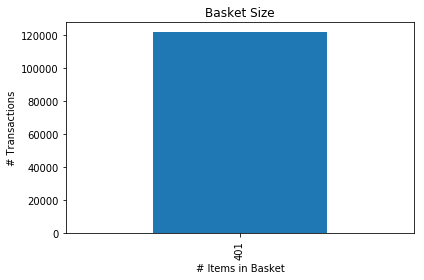

In [10]:
basket_sets.count(axis=1).value_counts().plot.bar(title='Basket Size')
plt.xlabel('# Items in Basket')
plt.ylabel('# Transactions')
plt.tight_layout();

In [11]:
basket_sets.head()

prod_idl,12,13,31,42,43,51,53,54,55,56,...,612,613,614,615,616,617,618,619,620,621
shdr_idl,,,,,,,,,,,,,,,,,,,,,
31423,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
31424,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [13]:
# Build up the frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)

In [14]:
frequent_itemsets.sort_values(by='support',ascending=False)

,support,itemsets
1,0.217386,(31)
58,0.200958,(163)
15,0.152730,(65)
67,0.103563,(242)
44,0.101233,(110)
66,0.089268,(239)
7,0.085555,(56)
29,0.082351,(81)
2,0.078728,(42)
63,0.073351,(178)


In [15]:
# Create the  association rules

In [16]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)

In [18]:
#sorting rules according to confidence
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
379,(180),(178),0.013002,0.073351,0.012887,0.991134,13.512151,0.011933,104.512737
375,(177),(176),0.009181,0.064079,0.009066,0.987444,15.409683,0.008478,74.539387
532,"(242, 301)",(54),0.009568,0.056973,0.009354,0.977625,17.159371,0.008809,42.146043
514,"(65, 301)",(54),0.009115,0.056973,0.008893,0.975610,17.124003,0.008374,38.664098
508,"(56, 301)",(54),0.005772,0.056973,0.005583,0.967190,16.976214,0.005254,28.741816
522,"(301, 110)",(54),0.006694,0.056973,0.006464,0.965560,16.947602,0.006083,27.381456
526,"(163, 301)",(54),0.007757,0.056973,0.007460,0.961783,16.881322,0.007018,24.675867
427,"(301, 31)",(54),0.009552,0.056973,0.009165,0.959483,16.840940,0.008621,23.274703
585,"(297, 110)",(163),0.006036,0.200958,0.005484,0.908595,4.521306,0.004271,8.741753
581,"(65, 297)",(163),0.005780,0.200958,0.005188,0.897436,4.465778,0.004026,7.790655


In [19]:
#sorting rules according to confidence
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
512,(301),"(56, 54)",0.033999,0.008753,0.005583,0.164204,18.759620,0.005285,1.185992
509,"(56, 54)",(301),0.008753,0.033999,0.005583,0.637817,18.759620,0.005285,2.667165
524,(301),"(110, 54)",0.033999,0.010375,0.006464,0.190119,18.324271,0.006111,1.221938
521,"(110, 54)",(301),0.010375,0.033999,0.006464,0.623016,18.324271,0.006111,2.562443
518,(301),"(65, 54)",0.033999,0.014385,0.008893,0.261565,18.182703,0.008404,1.334734
515,"(65, 54)",(301),0.014385,0.033999,0.008893,0.618203,18.182703,0.008404,2.530139
530,(301),"(163, 54)",0.033999,0.012261,0.007460,0.219424,17.896212,0.007043,1.265397
527,"(163, 54)",(301),0.012261,0.033999,0.007460,0.608462,17.896212,0.007043,2.467195
532,"(242, 301)",(54),0.009568,0.056973,0.009354,0.977625,17.159371,0.008809,42.146043
537,(54),"(242, 301)",0.056973,0.009568,0.009354,0.164186,17.159371,0.008809,1.184990


In [21]:
rules[ (rules['lift'] >= 2) & (rules['confidence'] >= 0.2) ].sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
509,"(56, 54)",(301),0.008753,0.033999,0.005583,0.637817,18.759620,0.005285,2.667165
521,"(110, 54)",(301),0.010375,0.033999,0.006464,0.623016,18.324271,0.006111,2.562443
518,(301),"(65, 54)",0.033999,0.014385,0.008893,0.261565,18.182703,0.008404,1.334734
515,"(65, 54)",(301),0.014385,0.033999,0.008893,0.618203,18.182703,0.008404,2.530139
527,"(163, 54)",(301),0.012261,0.033999,0.007460,0.608462,17.896212,0.007043,2.467195
530,(301),"(163, 54)",0.033999,0.012261,0.007460,0.219424,17.896212,0.007043,1.265397
532,"(242, 301)",(54),0.009568,0.056973,0.009354,0.977625,17.159371,0.008809,42.146043
514,"(65, 301)",(54),0.009115,0.056973,0.008893,0.975610,17.124003,0.008374,38.664098
508,"(56, 301)",(54),0.005772,0.056973,0.005583,0.967190,16.976214,0.005254,28.741816
522,"(301, 110)",(54),0.006694,0.056973,0.006464,0.965560,16.947602,0.006083,27.381456


In [22]:
rules[ (rules['lift'] >= 2) & (rules['confidence'] >= 0.2) ].sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
379,(180),(178),0.013002,0.073351,0.012887,0.991134,13.512151,0.011933,104.512737
375,(177),(176),0.009181,0.064079,0.009066,0.987444,15.409683,0.008478,74.539387
532,"(242, 301)",(54),0.009568,0.056973,0.009354,0.977625,17.159371,0.008809,42.146043
514,"(65, 301)",(54),0.009115,0.056973,0.008893,0.975610,17.124003,0.008374,38.664098
508,"(56, 301)",(54),0.005772,0.056973,0.005583,0.967190,16.976214,0.005254,28.741816
522,"(301, 110)",(54),0.006694,0.056973,0.006464,0.965560,16.947602,0.006083,27.381456
526,"(163, 301)",(54),0.007757,0.056973,0.007460,0.961783,16.881322,0.007018,24.675867
427,"(301, 31)",(54),0.009552,0.056973,0.009165,0.959483,16.840940,0.008621,23.274703
585,"(297, 110)",(163),0.006036,0.200958,0.005484,0.908595,4.521306,0.004271,8.741753
581,"(65, 297)",(163),0.005780,0.200958,0.005188,0.897436,4.465778,0.004026,7.790655
